In [1]:
#This code load images from my google drive.
#The cnn also has a saver that will saves the graphs into a file call 
#autoencoder8 for appearance and autoencdoer9 for landmarks



from google.colab import drive
drive.mount('/content/gdrive')

#!/usr/bin/python
from os import listdir
from PIL import Image as PImage
import matplotlib.pyplot as plt

imagesList = listdir('gdrive/My Drive/Project_1/images/')
imagesList = sorted(imagesList)
x_train = imagesList[0:800]
x_test = imagesList[800:1000]



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import scipy.io
landmarksList = listdir('gdrive/My Drive/Project_1/landmarks/')
landmarksList = sorted(landmarksList)
point_x_train = np.zeros((68,800))
point_y_train = np.zeros((68,800))
point_x_test = np.zeros((68, 200))
point_y_test = np.zeros((68, 200))
point_train = np.zeros((136,800))
point_test = np.zeros((136,800))

for i in range(0,800):
    mat = scipy.io.loadmat('gdrive/My Drive/Project_1/landmarks/' + landmarksList[i])
    point_x_train[:,i] = mat['lms'][:,0]
    
    point_y_train[:,i] = mat['lms'][:,1]
    
    point_train[:,i] = mat['lms'].flatten()
for i in range(0, 200):
    mat = scipy.io.loadmat('gdrive/My Drive/Project_1/landmarks/' + landmarksList[i+800])
    point_x_test[:,i] = mat['lms'][:,0]
    point_y_test[:,i] = mat['lms'][:,1]
    point_test[:,i] = mat['lms'].flatten()

In [0]:
x = np.random.rand(1000, 5)
indices = np.random.permutation(x.shape[0])
training_idx, test_idx = indices[:800], indices[800:]
training, test = x[training_idx,:], x[test_idx,:]


In [0]:
M_x = np.mean(point_x_train,axis = 1)
M_y = np.mean(point_y_train, axis = 1)
combined_mean = np.stack((M_x,M_y),axis = 1)

In [5]:
coor_train_original = point_train
coor_test_original = point_test

print(point_x_train.shape)


(68, 800)


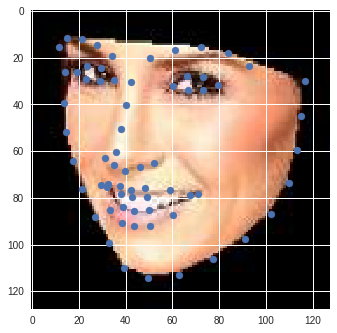

In [6]:
ss = PImage.open('gdrive/My Drive/Project_1/images/' + imagesList[0])
plt.imshow(ss)
temp = np.reshape(point_train[:,0], [68,2])
plt.scatter(temp[:,0], temp[:,1])


In [0]:
point_train_final = list()
for i in range(0, 800):
  point_train_final.append(point_train[:,i]/128)

In [0]:
point_train_final = np.asarray(point_train_final)


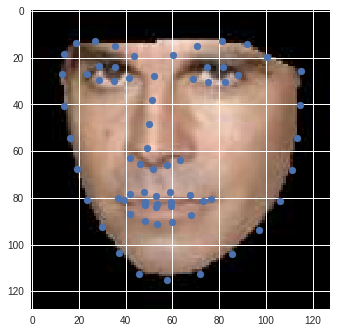

In [9]:
image = PImage.open('gdrive/My Drive/Project_1/images/' + imagesList[5])

x_sample = np.stack([point_x_train[:,5], point_y_train[:,5]], axis = 1)
plt.imshow(image)

plt.scatter(point_x_train[:,5], point_y_train[:,5])

In [10]:
point_test_final = list()
for i in range(0, 800):
  point_test_final.append(point_test[:,i]/128)
point_test_final = np.asarray(point_test_final)

print(point_test_final.shape)

(800, 136)


In [11]:
import numpy as np

import sys

!pip install imageio
sys.path.insert(0, 'gdrive/My Drive/Project_1/')
from  mywarper import *

    100% |████████████████████████████████| 3.3MB 9.0MB/s 
  Running setup.py bdist_wheel for imageio ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/e0/43/31/605de9372ceaf657f152d3d5e82f42cf265d81db8bbe63cde1
Successfully built imageio


In [0]:
combined_mean = np.stack((M_x,M_y),axis = 1)
train_list = list()
for i in range(0,800):
  image = PImage.open('gdrive/My Drive/Project_1/images/' + imagesList[i])
  image = np.asarray(image)
  temp_coor = np.stack([point_x_train[:,i], point_y_train[:,i]], axis= 1)
  image = warp(image,temp_coor, combined_mean)
  image_2 = (image - np.min(image))/np.ptp(image)
  train_list.append(image_2)

In [0]:
train_array = np.asarray(train_list)


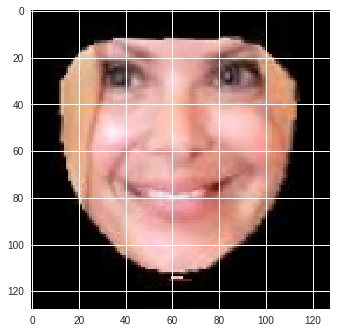

In [36]:
plt.imshow(train_array[200])

In [0]:
test_list = list()
for i in range(0,200):
  image = PImage.open('gdrive/My Drive/Project_1/images/' + x_test[i])
  image = np.asarray(image)
  temp_coor = np.stack([point_x_test[:,i], point_y_test[:,i]], axis= 1)
  image = warp(image,temp_coor, combined_mean)
  image_2 = (image - np.min(image))/np.ptp(image)
  test_list.append(image_2)

In [0]:
test_array= np.asarray(test_list)

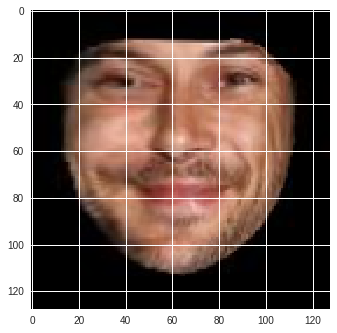

In [16]:
plt.imshow(test_array[4])

In [41]:
print(train_array.shape[0:])

(800, 128, 128, 3)


In [18]:
import tensorflow as tf


##########################
### DATASET
##########################




##########################
### SETTINGS
##########################

# Hyperparameters
learning_rate = 7e-4
training_epochs = 300
batch_size = 100

# Other
print_interval = 200
random_seed = 123


##########################
### GRAPH DEFINITION
##########################

g = tf.Graph()



with g.as_default():
    
    tf.set_random_seed(random_seed)
    
      # Input data
    tf_x = tf.placeholder(tf.float32, [None, 128,128,3], name='inputs')
    input_layer = tf.reshape(tf_x, shape=[-1, 128, 128, 3])

    ###########
    # Encoder
    ###########
    
    # 28x28x1 => 28x28x8
    conv1 = tf.layers.conv2d(input_layer, filters=16, kernel_size=(5, 5),
                             strides=(2, 2), padding='same', 
                             activation=tf.nn.leaky_relu)
    
    print(conv1.shape)

    conv2 = tf.layers.conv2d(conv1, filters=32, kernel_size=(3, 3), 
                             strides=(2, 2), padding='same', 
                             activation=tf.nn.leaky_relu)
    print(conv2.shape)
    
    conv3 = tf.layers.conv2d(conv2, filters=64, kernel_size=(3, 3), 
                             strides=(2, 2), padding='same', 
                             activation=tf.nn.leaky_relu)
    
    print(conv3.shape)
    conv4 = tf.layers.conv2d(conv3, filters=128, kernel_size=(3, 3), 
                             strides=(2, 2), padding='same', 
                             activation=tf.nn.leaky_relu)
    

    print(conv4.shape)
    
    conv5 = tf.layers.conv2d(conv4, filters=50, kernel_size = (8,8), 
                            strides = (1,1), padding='valid')
    

    encode = tf.layers.dense(conv5, 50, tf.nn.leaky_relu, name = 'encoding')
    
   

    ###########
    # Decoder
    ###########
    

    
    deconv1 = tf.layers.conv2d_transpose(encode, filters=128, 
                                         kernel_size=(8, 8), strides=(1,1), 
                                         padding='valid',
                                         activation=tf.nn.leaky_relu)
    print(deconv1)
    
    # 14x14x8 => 28x28x8
    deconv2 = tf.layers.conv2d_transpose(deconv1, filters=64, 
                                         kernel_size=(3, 3), strides=(2, 2), 
                                         padding='same',
                                         activation=tf.nn.leaky_relu)
    print(deconv2)
    
    deconv3 = tf.layers.conv2d_transpose(deconv2, filters=32, 
                                         kernel_size=(3, 3), strides=(2, 2), 
                                         padding='same',
                                         activation=tf.nn.leaky_relu)
    print(deconv3)
    
    deconv4 = tf.layers.conv2d_transpose(deconv3, filters=16, 
                                         kernel_size=(3, 3), strides=(2, 2), 
                                         padding='same',
                                         activation=tf.nn.leaky_relu)
    print(deconv4)

   
    
    # 28x28x8 => 28x28x1
    logits = tf.layers.conv2d_transpose(deconv4, filters=3, kernel_size=(5,5), 
                              strides=(2, 2), padding='same', 
                              activation=None)
    
    print(logits)
   
    
    decode = tf.nn.sigmoid(logits, name='decoding')
    
    print(decode)

    ##################
    # Loss & Optimizer
    ##################
    
    #loss = tf.squared_difference(decode, input_layer )
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=input_layer,
                                                   logits=logits)
    cost = tf.reduce_mean(loss, name='cost')
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train = optimizer.minimize(cost, name='train')    

    # Saver to save session for reuse
    saver = tf.train.Saver()
    
   
    tf_x_2 = tf.placeholder(tf.float32, [None, 136], name='inputs2')
    input_layer_2 = tf.reshape(tf_x_2, shape=[-1, 136])
   # print(input_layer_2.shape)
    dense1 = tf.layers.dense(input_layer_2, 100, tf.nn.leaky_relu)
    #print(dense1.shape)
    dense2 = tf.layers.dense(dense1, 10, activation = None)
    print(dense2)
    
    encode2 = tf.nn.leaky_relu(dense2, name = 'encoding2')
     
    
    print(encode2.shape)
    print(encode2)
    #decode
    dense2 = tf.layers.dense(encode2, 100, tf.nn.leaky_relu)
    print(dense2)
    logits2 = tf.layers.dense(dense2, 136, activation = None)
    print(logits2.shape)
    decode2 = tf.nn.sigmoid(logits2, name='decoding2')
    
    #loss2 = tf.squared_difference(decode2, input_layer_2)
    loss2 = tf.nn.sigmoid_cross_entropy_with_logits(labels=input_layer_2,
                                                   logits=logits2)
    cost2 = tf.reduce_mean(loss2, name='cost2')
    optimizer2 = tf.train.AdamOptimizer(learning_rate)
    train2 = optimizer2.minimize(cost2, name='train2')    
    
    print(decode2)

    # Saver to save session for reuse
    saver2 = tf.train.Saver()




(?, 64, 64, 16)
(?, 32, 32, 32)
(?, 16, 16, 64)
(?, 8, 8, 128)
Tensor("conv2d_transpose/LeakyRelu:0", shape=(?, 8, 8, 128), dtype=float32)
Tensor("conv2d_transpose_1/LeakyRelu:0", shape=(?, 16, 16, 64), dtype=float32)
Tensor("conv2d_transpose_2/LeakyRelu:0", shape=(?, 32, 32, 32), dtype=float32)
Tensor("conv2d_transpose_3/LeakyRelu:0", shape=(?, 64, 64, 16), dtype=float32)
Tensor("conv2d_transpose_4/BiasAdd:0", shape=(?, 128, 128, 3), dtype=float32)
Tensor("decoding:0", shape=(?, 128, 128, 3), dtype=float32)
Tensor("dense_1/BiasAdd:0", shape=(?, 10), dtype=float32)
(?, 10)
Tensor("encoding2:0", shape=(?, 10), dtype=float32)
Tensor("dense_2/LeakyRelu:0", shape=(?, 100), dtype=float32)
(?, 136)
Tensor("decoding2:0", shape=(?, 136), dtype=float32)


In [19]:
import numpy as np

##########################
### TRAINING & EVALUATION
##########################
    
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())

    np.random.seed(random_seed) 
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = 8
        count = 0
        #for t, x_np in enumerate(train_dset):
        for i in range(total_batch):
            
            #batch_x = tf.train.batch([train_array_tensor], batch_size=100)
            batch_x = train_array[count:count+100,:,:,:]
            batch_x_2 = point_train_final[count:count+100,:]
            count+=100
            
            c = sess.run(['train', 'cost:0', 'train2', 'cost2:0'], feed_dict={'inputs:0': batch_x, 'inputs2:0':batch_x_2})
            
            
            avg_cost += c[1] + c[3]
            
          #  _, c2 = sess.run(['train2', 'cost2:0'], feed_dict={'inputs2:0':batch_x_2})

            if not i % print_interval:
                print("Minibatch: %03d | Cost image:    %.3f" % (i + 1, c[1] ))
                print("Minibatch: %03d | Cost landmark:    %.3f" % (i + 1, c[3] ))

        print("Epoch:     %03d | AvgCost: %.3f" % (epoch + 1, avg_cost / (i + 1)))
    
    saver.save(sess, save_path='./autoencoder8.ckpt')
    saver2.save(sess, save_path='./autoencoder9.ckpt')

Minibatch: 001 | Cost image:    0.693
Minibatch: 001 | Cost landmark:    0.693
Epoch:     001 | AvgCost: 1.378
Minibatch: 001 | Cost image:    0.688
Minibatch: 001 | Cost landmark:    0.674
Epoch:     002 | AvgCost: 1.292
Minibatch: 001 | Cost image:    0.549
Minibatch: 001 | Cost landmark:    0.640
Epoch:     003 | AvgCost: 1.089
Minibatch: 001 | Cost image:    0.396
Minibatch: 001 | Cost landmark:    0.612
Epoch:     004 | AvgCost: 0.988
Minibatch: 001 | Cost image:    0.367
Minibatch: 001 | Cost landmark:    0.597
Epoch:     005 | AvgCost: 0.957
Minibatch: 001 | Cost image:    0.355
Minibatch: 001 | Cost landmark:    0.592
Epoch:     006 | AvgCost: 0.945
Minibatch: 001 | Cost image:    0.348
Minibatch: 001 | Cost landmark:    0.590
Epoch:     007 | AvgCost: 0.939
Minibatch: 001 | Cost image:    0.344
Minibatch: 001 | Cost landmark:    0.589
Epoch:     008 | AvgCost: 0.935
Minibatch: 001 | Cost image:    0.342
Minibatch: 001 | Cost landmark:    0.589
Epoch:     009 | AvgCost: 0.933
M

In [20]:
print(point_train_final.shape)
print(train_array.shape)
with tf.Session(graph=g) as sess:
    saver.restore(sess, save_path='./autoencoder8.ckpt')
    encoded = sess.run('encoding/LeakyRelu:0', 
                        feed_dict={'inputs:0': train_array})


    
    




(800, 136)
(800, 128, 128, 3)
INFO:tensorflow:Restoring parameters from ./autoencoder8.ckpt


In [21]:
with tf.Session(graph=g) as sess:
    saver.restore(sess, save_path='./autoencoder8.ckpt')
    encoded = sess.run('encoding/LeakyRelu:0', 
                        feed_dict={'inputs:0': train_array})

images_list = list()
appearance_reshape = np.reshape(encoded, [800,50])
appearance_variance = np.var(appearance_reshape, axis = 0)
idx = (-appearance_variance).argsort()[:4]

max_list = list()

for i in idx:
  p = appearance_reshape[:,i]
  max_list.append(np.amax(p))

min_list = list()
for i in idx:
  p = appearance_reshape[:,i]
  min_list.append(np.amin(p))

appearance_transform_list = list()

chosen_image = encoded[1]



  
for i in range(0,4):
  temp = chosen_image.flatten()
  temp_highest = temp[idx[i]]
  temp_min = (temp[idx[i]] - min_list[i])/5
  temp_max = (max_list[i] - temp[idx[i]])/5
  min_x = min_list[i]
  list_of_number_to_change = list()
  for h in range(0,5):
    list_of_number_to_change.append(min_x + temp_min)
    min_x = min_x + temp_min
  for l in range(0,5):
    list_of_number_to_change.append(temp_highest + temp_max)
    temp_highest = temp_highest + temp_max
  for j in range(0,10):
    temp = chosen_image.flatten()
    temp[idx[i]] = list_of_number_to_change[j]
    
    
      
    
    temp = np.expand_dims(temp,axis = 0)
    temp = np.expand_dims(temp,axis = 0)
    temp = np.expand_dims(temp,axis = 0)

    with tf.Session(graph=g) as sess:
        saver.restore(sess, save_path='./autoencoder8.ckpt')
        encoded2 = sess.run(['conv2d_transpose/LeakyRelu:0', 'conv2d_transpose_1/LeakyRelu:0', 
                            'conv2d_transpose_2/LeakyRelu:0', 'conv2d_transpose_3/LeakyRelu:0', 'conv2d_transpose_4/BiasAdd:0','decoding:0'],
                            feed_dict={'encoding/LeakyRelu:0': temp})
    x4 = encoded2[5]
    x5 = np.reshape(x4, [128,128,3])
    appearance_transform_list.append(x5)

INFO:tensorflow:Restoring parameters from ./autoencoder8.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder8.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder8.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder8.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder8.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder8.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder8.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder8.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder8.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder8.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder8.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder8.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder8.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder8.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder8.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder8.ckpt
INFO:ten

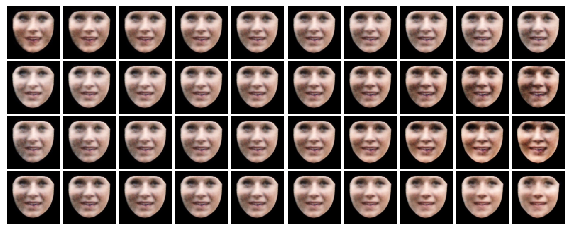

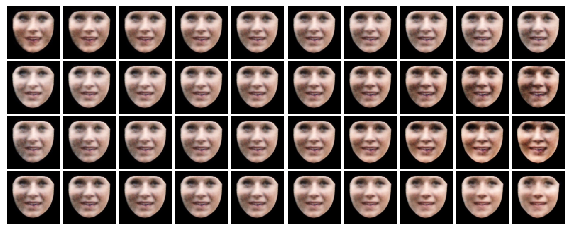

In [22]:
array = np.asarray(appearance_transform_list)


plot(array, 4,10,3,128,128)

In [23]:
with tf.Session(graph=g) as sess:
    saver2.restore(sess, save_path='./autoencoder9.ckpt')
    encoded2 = sess.run('encoding2:0', 
                        feed_dict={'inputs2:0': point_train_final})
print(encoded2.shape)

encoded2 = encoded2

INFO:tensorflow:Restoring parameters from ./autoencoder9.ckpt
(800, 10)


In [24]:
with tf.Session(graph=g) as sess:
    saver2.restore(sess, save_path='./autoencoder9.ckpt')
    encoded2 = sess.run('encoding2:0', 
                        feed_dict={'inputs2:0': point_train_final})

landmark_list = list()
landmark_reshape = encoded2
landmark_variance = np.var(landmark_reshape, axis = 0)
idx = (-landmark_variance).argsort()[:2]

max_list = list()

for i in idx:
  p = landmark_reshape[:,i]
  max_list.append(np.amax(p))

min_list = list()
for i in idx:
  p = landmark_reshape[:,i]
  min_list.append(np.amin(p))

landmark_transform_list = list()



chosen_coordinate = encoded2[6]


for i in range(0,2):
  temp = chosen_coordinate.flatten()
  temp_highest = temp[idx[i]]
  temp_min = (temp[idx[i]] - min_list[i])/5
  temp_max = (max_list[i] - temp[idx[i]])/5
  min_x = min_list[i]
  list_of_number_to_change = list()
  for h in range(0,5):
    list_of_number_to_change.append(min_x + temp_min)
    min_x = min_x + temp_min
  for l in range(0,5):
    list_of_number_to_change.append(temp_highest + temp_max)
    temp_highest = temp_highest + temp_max
  for j in range(0,10):
    temp = chosen_coordinate.flatten()
    temp[idx[i]] = list_of_number_to_change[j]
    
    
      
    
    temp = np.expand_dims(temp,axis = 0)
    with tf.Session(graph=g) as sess:
      saver2.restore(sess, save_path='./autoencoder9.ckpt')
      encoded9 = sess.run(['dense_2/LeakyRelu:0', 'decoding2:0'],
                          feed_dict={'dense_1/BiasAdd:0': temp})
 
    x4 = encoded9[1]*128

    x5 = np.reshape(x4, [68,2])
    landmark_transform_list.append(x5)


INFO:tensorflow:Restoring parameters from ./autoencoder9.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder9.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder9.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder9.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder9.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder9.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder9.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder9.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder9.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder9.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder9.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder9.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder9.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder9.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder9.ckpt
INFO:tensorflow:Restoring parameters from ./autoencoder9.ckpt
INFO:ten

In [25]:
array2 = np.asarray(landmark_transform_list)
print(array2.shape)
coordi = np.stack([point_x_train[:,6], point_y_train[:,6]], axis=1)
image_to_show = list()
for i in range(20):
  image = PImage.open('gdrive/My Drive/Project_1/images/' + x_train[6])
  image = np.asarray(image)
  warped_image = warp(image, coordi, array2[i])
  image_to_show.append(warped_image)
image_to_show = np.asarray(image_to_show)
  

(20, 68, 2)


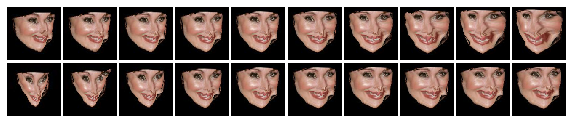

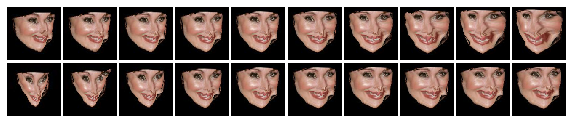

In [50]:
plot(image_to_show, 2,10,3,128,128)

INFO:tensorflow:Restoring parameters from ./autoencoder8.ckpt
(200, 128, 128, 3)
INFO:tensorflow:Restoring parameters from ./autoencoder9.ckpt
(800, 136)


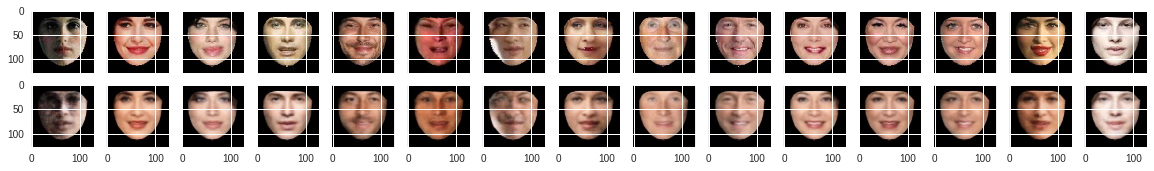

In [26]:


%matplotlib inline
import matplotlib.pyplot as plt

##########################
### VISUALIZATION
##########################

n_images = 15

fig, axes = plt.subplots(nrows=2, ncols=n_images, sharex=True, 
                         sharey=True, figsize=(20, 2.5))
test_images = test_array

with tf.Session(graph=g) as sess:
    saver.restore(sess, save_path='./autoencoder8.ckpt')
    decoded = sess.run('decoding:0', feed_dict={'inputs:0': test_images})
print(decoded.shape)

with tf.Session(graph=g) as sess:
    saver2.restore(sess, save_path='./autoencoder9.ckpt')
    decoded2 = sess.run('decoding2:0', feed_dict = {'inputs2:0': point_test_final})
    
for i in range(n_images):
    for ax, img in zip(axes, [test_images, decoded]):
        ax[i].imshow(img[i])
        



print(decoded2.shape)



In [0]:
CNN_reconstructed_image = list()
for i in range(0,10):
  
  f = decoded2[i]
  f2 = decoded[i]
  f3 = np.reshape(f2, [128, 128, 3])
  f = np.reshape(f, [68,2]) * 128



  x_sample = f[:,0]
  y_sample = f[:,1] 
  f4 = warp(f3, combined_mean, f )
  

  CNN_reconstructed_image.append(f4)



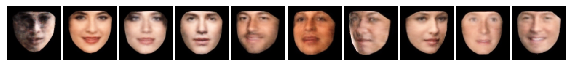

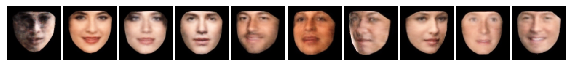

In [28]:
CNN_reconstructed_image = np.asarray(CNN_reconstructed_image)
plot(CNN_reconstructed_image, 1,10,3,128,128)

In [0]:
original_image = list()
for i in range(0,10):
  image = PImage.open('gdrive/My Drive/Project_1/images/' + x_test[i])
  image = np.asarray(image)
  original_image.append(image)
original_image = np.asarray(original_image)

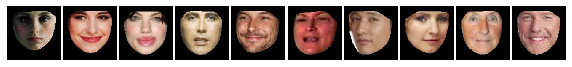

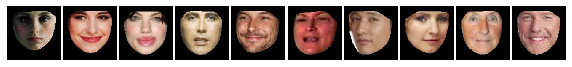

In [30]:
plot(original_image, 1,10,3,128,128)